In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input

In [2]:
base_model = DenseNet201(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [7]:
for layer in base_model.layers:
    layer.trainable = False


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Validation',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 9871 images belonging to 2 classes.
Found 1067 images belonging to 2 classes.


In [6]:
model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)


Epoch 1/10
309/309 [==============================] - 802s 3s/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.1298 - val_accuracy: 0.9400
Epoch 2/10
309/309 [==============================] - 775s 3s/step - loss: 0.0089 - accuracy: 0.9988 - val_loss: 0.1968 - val_accuracy: 0.9306
Epoch 3/10
309/309 [==============================] - 805s 3s/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.2211 - val_accuracy: 0.9306
Epoch 4/10
309/309 [==============================] - 800s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1833 - val_accuracy: 0.9410
Epoch 5/10
309/309 [==============================] - 796s 3s/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0857 - val_accuracy: 0.9719
Epoch 6/10
309/309 [==============================] - 809s 3s/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.2076 - val_accuracy: 0.9381
Epoch 7/10
309/309 [==============================] - 796s 3s/step - loss: 6.2034e-04 - accuracy: 1.0000 - val_loss: 0.2785 - val_accuracy: 0.

In [8]:
model.save('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/fire_detection_densenet201.h5')


In [10]:
from tensorflow.keras.preprocessing import image

img_path = 'C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/Fire/55_frame_180.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = model.predict(img_array)
if prediction[0][0] > prediction[0][1]:
    print('Fire Detected')
else:
    print('No Fire Detected')


1/1 [==============================] - 2s 2s/step
No Fire Detected


In [4]:
model1 =tf.keras.models.load_model('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/DenseNet201.h5')

In [11]:
IMG_SIZE = (224, 224)
# prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/', target_size=IMG_SIZE, batch_size=32, class_mode='categorical')

# evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 1167 images belonging to 2 classes.
37/37 [==============================] - 89s 2s/step - loss: 0.8641 - accuracy: 0.3316
Test loss: 0.8641
Test accuracy: 0.3316


In [12]:
from sklearn.metrics import confusion_matrix
# make predictions on the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# get the true labels
y_true = test_generator.classes

# create the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

print('Confusion Matrix:')
print(conf_mat)

37/37 [==============================] - 95s 3s/step
Confusion Matrix:
[[254 221]
 [363 329]]


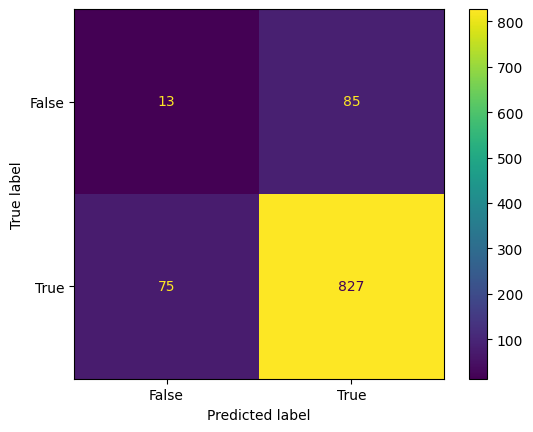

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()